# Chekhov's writing style analysis: A shift from actions to inner struggles and finally the balanced point

## Yuming Huang
Instructions:

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
2. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (.ipynb) will be the only thing you turn in.
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with #), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters?
4. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable.
5. Proofread well! If English is not your first language, you might consider making an appointment with the Writing Center to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like Grammerly. (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
6. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
7. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use MLA Style as the format for your bibliography, and title it "works cited."
8. Replace the value of the filename variable in the wordcount cell below to the name your file. (E.g., Jonathan-Final.ipynb.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.
9. Optionally, and for a 5% bonus, add your notebook to the /Projects directory of the course repository, and submit it as a pull request. Your project will then become public.
10. Email me your .ipynb file: jonathan.reeve@columbia.edu. Please email me only your .ipynb file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: Yourname: Final Project, replacing yourname with your name. Do this regardless of whether you also submit a pull request.
11. Celebrate! You've finished your final project, and gloriously completed Introduction to Computational Literary Analysis!

In [1]:
# Import all your libraries here, and only here, please.
import nltk
from nltk import word_tokenize, sent_tokenize, pos_tag
from matplotlib import pyplot as plt
from nltk.util import ngrams
from nltk.corpus import wordnet as wn
from collections import Counter
import pandas as pd
import os
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pylab import *
import numpy as np
from sklearn.cluster import KMeans
import pyLDAvis.sklearn
from collections import Counter
import matplotlib as mpl
%matplotlib inline

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 15]

C:\Users\93264\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\93264\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [2]:
filename = 'YumingHuang-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('YumingHuang-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1934


In [3]:
%cd Desktop/things/Chekhov/

C:\Users\93264\Desktop\things\Chekhov


# Chekhov's writing style analysis: A shift from actions to inner struggles and finally the balanced point

When I read the early novels of Chekhov's, I found the length of which is short but the irony is intense. However, with the time passing, I find the novels are becoming longer and longer, the writing targets are not limited to the actions of crownish people who live in cracks, but also to have lots of details about the inner behaviors of the people. So, I have made some hyposis below:

1. The target objects shifted from the description of people's outside behaviors to the description of people's inner struggles, along with social relationship. And finally reached a balance.

2. With the length of articles increases, Chekhov can focus more on the details of things, not only there can be more dialogs, but also can be more interactions between people.



## The shift from actions to inner struggles and social relationship, finally reaching a balance


I have read lots of Chekhov's stories and found that in the early stage of his writing, he was familar with the description of people's actions and dialogs, which are used to show crownish characterestics of the characters' and the conflicts between maybe just a few words. 

Like in the _A Chameleon_,written in 1882-1885, he used lots of description to show the changes of the police's attitude towards the dog, influenced just by the possible owner of the dog. For example, someone said "I fancy it's General Zhigalov's"(para 21) when the police first asks who is the owner of the dog, then it comes the interesting description that he wants to take off his coat and said "It's a little dog, and you are a great hulking fellow! You must have scratched your finger with a nail, and then the idea struck you to get damages for it. We all know . . . your sort! I know you devils"!(para 23) When later, someone has doubted that the dog cannot beb the General's dog, the police changes his attitude suddenly and said "You've been injured, Hryukin, and we can't let the matter drop. . . . We must give them a lesson"!(para 37) And, when there is another voice to tell the police that the dog might be the General's brother's, the police just wants to put on his coat again and decides to punlish the worker just like what he wants to do when he heards that the dog might belongs to the General. In a story short like this, seven thousand words, there is no more place for him to put in lots of details but with the description of the dialogs and some minimal details of contrasted actions to show the confilits inside the characters implicitly.

With the time passing, there are more inner emotional descriptions deadded into the stories. Like _The Man In A Case_, written in 1896-1904, Chekhov writes in his late years, has put lots of details of what the old fellow looks like. Chekhov has descriebed many aspects of him; "a tall, lean old fellow with long moustaches, was sitting outside the door, smoking a pipe in the moonlight. Burkin was lying within on the hay, and could not be seen in the darkness."(para 5)On the other side, the Chekhov uses an event about  the old fellow's dating to show his narrow and limited ideas. Also, there are some direct psychological descriptions about both the old fellow and other people around him. There are more and more explicit description of other people, and there is no longer a one-man show. All the new status above cannot be seen at the early stage of Chekhov's writing and it's not surprisingly that the length of the story is more than four times the length of _A Chameleon_.

And, from figure one, we can see that there is absolutly changes among the writings of the Chekhov's. The more interesting part is that, the two end of the writing periods in the figure are not the start and end points of the time. At last, there is a rebound from the bottom of the figure into the middle, which can suggest that by thinking through all his life, Chekhov then came to a balanced state that can realize the balance between the descrition of inside and outside people. From figure three, we can see there is a huge shift in communication. More verbs are used. It can suggest that communication is becoming more and more important. As I have mentioned, there is no longer an one-man show, more interactions are added into the stories.

## More details and more interactions

With the length increase, I wonder what's new is put into the stories. By close reading, I found there are more and more details added into the stories. 

At first, all the item descriptions are for contradictory comparisons. Like in the _A Chameleon_, the item of the coat, the dog, the worker are all the must components of the articles, which shows the contraries inside them. The dog's fate is judged by its owner, which is a society that doesn't treat people like human beings. The coat suggests the embarrassing circumstances that the police is in, and the actions of on and off are the signals. In a length of seven thousand words, Chekhov just used the components to show the irony。

And then we find that more and more details are added into the stories. Like in _A Day In The Country_, written in 1886, has added lots of details to describe the stage itself, but not to promote the development of the irony, "A dark leaden-coloured mass is creeping over the sky towards the sun. Red zigzags of lightning gleam here and there across it. There is a sound of far-away rumbling. A warm wind frolics over the grass, bends the trees, and stirs up the dust. "(para 1)Futher more, in the later stage, with the length becoming longer and longer, not only the environment, but also adding some description of other people's thoughts, who are not main character. 

Also, from the fiture two, we can see that there is no big change among the components ratio, which means Chekhov just used the same structure into the stories. More details, more descriptions and more aspects of the descriptions. The length has increased the amount of the details and made the stories not just an intense irony, but a lively story with emotions insides.

## Conclusions
The writing style of Chekhov has changed with time passing, he focusd more on the details, along with interactions and social relationship.
1. From PCA test, after we have splited the passages into parts of the same length, the different articles of different writing periods are distinguishable.
2. With the topic analysis, the frequency of different pos in the topics show us a tendency of changes of writing styles but not the changes of writing structure. He just added more details but not to use other kinds of presentation to replace his style.
3. The frequency of different synsets suggest that Chekhov focused more on inner, psychological activies with time passing and the writing themes have not obviously changed.

## nameList and nameLength

In [4]:
List = os.listdir()#get all the file names

In [5]:
'''
names = []
for name in List:
    names.append(name.split('.')[0])
    locals()[name.split('.')[0]] = open(name).read()#construct variables for all the files
'''

"\nnames = []\nfor name in List:\n    names.append(name.split('.')[0])\n    locals()[name.split('.')[0]] = open(name).read()#construct variables for all the files\n"

In [6]:
def print2Lists(list1, list2):
    if len(list1)==len(list2):
        for i in range(len(list1)):
            print(list1[i],list2[i])
    else:
        print("the lengths of the two list are not the same and cannot be printed")

In [7]:
allText = [open(name).read() for name in List]

In [8]:
nameList = [name.split('.')[0] for name in List]

In [9]:
nameLength = [len(sto) for sto in allText]

In [10]:
print2Lists(nameList, nameLength)

1882-1885__A_Chameleon 7121
1882-1885__A_Dead_Body 9693
1882-1885__Oh!_The_Public 7566
1886__A_Day_In_The_Country 12971
1886__A_Joke 8855
1886__A_Nightmare 29586
1887__A_Problem 14983
1887__The_Beggar 11001
1887__The_Lottery_Ticket 10460
1888-1895__ Peasant_Wives 30463
1888-1895__The_Horse_Stealers 35901
1888-1895__The_Murder 66938
1896-1904__About_Love 20816
1896-1904__At_Home 27081
1896-1904__The_Man_In_A_Case 29355


In [11]:
yearList = list(set([name.split('__')[0] for name in nameList]))

In [12]:
yearList.sort()

In [13]:
yearLength =[]
for year in yearList:
    length = 0
    for i in range(len(nameList)):
        #print(nameList[i].split('__')[0], year)
        if nameList[i].split('__')[0]==year:
            length+=nameLength[i]
            #print('yeah')
    yearLength.append(length)

In [14]:
print2Lists(yearList, yearLength)

1882-1885 24380
1886 51412
1887 36444
1888-1895 133302
1896-1904 77252


It shows that the length of the articles are becoming longer and longer, which means it is necessary to put the length factor into consideration when doing pca tests

# PCA test

So, first I read in all the files, tokenize them and then split them into the same length of the minimal length of the article. As I have mentioned before, the length of different words of different periods vary, I have show a contrast between before and after spliting. And, I also want to know whether idf will bother.

In [15]:
least = 100000
for length in nameLength:
    if length<least:
        least = length

In [16]:
for name in allText:
    print(name[:20])#to check if the articles are all well

A CHAMELEON
by Anton
A DEAD BODY
by Anton
OH! THE PUBLIC
by An
A DAY IN THE COUNTRY
A JOKE
by Anton Chek
A NIGHTMARE
by Anton
A PROBLEM
by Anton C
THE BEGGAR
by Anton 
THE LOTTERY TICKET
b
PEASANT WIVES
by Ant
THE HORSE-STEALERS
b
THE MURDER
by Anton 
ABOUT LOVE
by Anton 
AT HOME
by Anton Che
THE MAN IN A CASE
by


In [17]:
nameListNew = []
allTextNew = []
'''
for name in namesLength:   #to divide articles into parts of the same length 
    length = namesLength[name]
    parts = int(length/least)
    text = locals()[name]
    print("the name is",name,"and the parts number is: ",parts)
    if parts<=1:
        print('continue')
        names_new.append(name)
        continue
        
    for i in range(parts):
        locals()[name+'_part_'+str(i)] = text[(i-1)*least:i*least]
        names_new.append(name+'_part_'+str(i))
'''

for i in range(len(nameLength)):
    length = nameLength[i]
    parts = int(length/least)
    text = allText[i]
    print("the name is", nameList[i],"and the parts number is: ", parts)
    if parts<=1:
        print('continue')
        nameListNew.append(nameList[i])
        allTextNew.append(text[:least])
        continue
    for a in range(parts):
        nameListNew.append(nameList[i]+"Part"+str(a))
        #print("the text is {}".format(text[(a)*least:(a+1)*least+20]))
        allTextNew.append(text[(a)*least:(a+1)*least])
    

the name is 1882-1885__A_Chameleon and the parts number is:  1
continue
the name is 1882-1885__A_Dead_Body and the parts number is:  1
continue
the name is 1882-1885__Oh!_The_Public and the parts number is:  1
continue
the name is 1886__A_Day_In_The_Country and the parts number is:  1
continue
the name is 1886__A_Joke and the parts number is:  1
continue
the name is 1886__A_Nightmare and the parts number is:  4
the name is 1887__A_Problem and the parts number is:  2
the name is 1887__The_Beggar and the parts number is:  1
continue
the name is 1887__The_Lottery_Ticket and the parts number is:  1
continue
the name is 1888-1895__ Peasant_Wives and the parts number is:  4
the name is 1888-1895__The_Horse_Stealers and the parts number is:  5
the name is 1888-1895__The_Murder and the parts number is:  9
the name is 1896-1904__About_Love and the parts number is:  2
the name is 1896-1904__At_Home and the parts number is:  3
the name is 1896-1904__The_Man_In_A_Case and the parts number is:  4


In [18]:
tfidf = TfidfVectorizer(use_idf=False, max_features=1500)
tfidf_ = TfidfVectorizer(use_idf=True, max_features=1500)

In [19]:
tfTable = tfidf.fit_transform(allText).todense()
tfTable_new = tfidf.fit_transform(allTextNew).todense()
tfTable_ = tfidf_.fit_transform(allText).todense()
tfTable_new_ = tfidf_.fit_transform(allTextNew).todense()

In [20]:
pca = PCA(n_components = 50)

In [21]:
pcaOut= pca.fit_transform(tfTable)
pcaOut_new = pca.fit_transform(tfTable_new)
pcaOut_= pca.fit_transform(tfTable_)
pcaOut_new_ = pca.fit_transform(tfTable_new_)

In [22]:
Kmeans = KMeans(n_clusters=7, random_state =0).fit_predict(pcaOut)
Kmeans_new = KMeans(n_clusters=7, random_state=0).fit_predict(pcaOut_new)
Kmeans_ = KMeans(n_clusters=7, random_state =0).fit_predict(pcaOut_)
Kmeans_new_ = KMeans(n_clusters=7, random_state=0).fit_predict(pcaOut_new_)

"\nplt.subplot(248)\nplt.scatter(pcaOut_new_[:,0],pcaOut_new_[:,1],c=Kmeans_new_)\nplt.title('1-8-clustering')\n"

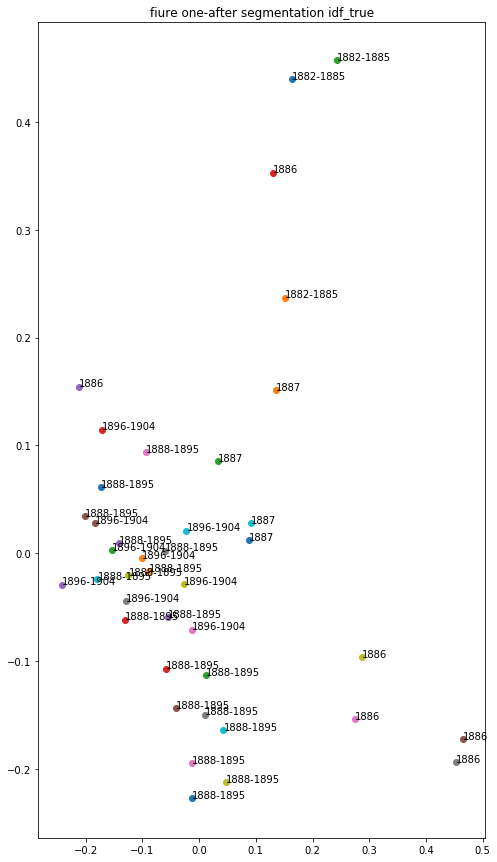

In [66]:
plt.rcParams['figure.figsize'] = [8, 15]
'''
plt.subplot(241)
xs, ys = pcaOut[:,0],pcaOut[:,1]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(nameList[i],(xs[i],ys[i]))
plt.title('1-1-text')

plt.subplot(242)
plt.scatter(pcaOut[:,0],pcaOut[:,1],c=Kmeans)

plt.title('1-2-clustering')


plt.subplot(245)

xs_n, ys_n = pcaOut_new[:,0],pcaOut_new[:,1]
for i in range(len(xs_n)):
    plt.scatter(xs_n[i],ys_n[i])
    plt.annotate(nameListNew[i].split('__')[0],(xs_n[i],ys_n[i]))
    if xs_n[i]>0.4:
        print(nameListNew[i])
plt.title('figure 1-after segmentation')


plt.subplot(246)
plt.scatter(pcaOut_new[:,0],pcaOut_new[:,1],c=Kmeans_new)
plt.title('1-6-clustering')

plt.subplot(243)
xs, ys = pcaOut_[:,0],pcaOut_[:,1]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(nameList[i],(xs[i],ys[i]))
plt.title('1-3-text idf_true')

plt.subplot(244)
plt.scatter(pcaOut_[:,0],pcaOut_[:,1],c=Kmeans_)
plt.title('1-4-clustering')

plt.subplot(247)
'''
xs_n, ys_n = pcaOut_new_[:,0],pcaOut_new_[:,1]
for i in range(len(xs_n)):
    plt.scatter(xs_n[i],ys_n[i])
    plt.annotate(nameListNew[i].split('__')[0],(xs_n[i],ys_n[i]))
plt.title('fiure one-after segmentation idf_true')

'''
plt.subplot(248)
plt.scatter(pcaOut_new_[:,0],pcaOut_new_[:,1],c=Kmeans_new_)
plt.title('1-8-clustering')
'''

From the figure one, we can see a obvious change from time "1882-1885" to the time"1896-1904", which confirms me hyposis that the style of Chekhov's writing has changed with time passing. The time "1886" is kind of transitional phase, and his style of writing may be not stable and it shows some characters similar to the time "1888-1895" and time"1887". In general, the graph does tell us that the writing style of Chekhov has changed with the time line.

# Topic analyze

As I am considering the difference between different writing peirods, so I would like to see if the pos of the articles of the different writing periods differ.

In this part, I follow the steps talked in the class and analyze topics of different year periods. After finding the topics of different articles, I then count the frequency of different words in the topics of articles. If the word appears more than one topics, I think the word will have some special meaning for Chekhov. After doing that, I then use pos_tag function to find the pos of the words. I cannot easily find the meaning of the words in the context, so I try to analyze the words with their pairs of pos. I store the pairs of pos under the different periods of time. After that, I use pd.DataFrame to store the frequency and plot them.

In [24]:
def chunk(tokens, size):
    return list(zip(*[tokens[i::size] for i in range(size)]))

In [25]:
allTextTokens = [word_tokenize(text) for text in allText]

In [26]:
allTextChunks = [chunk(text,500) for text in allTextTokens]

In [27]:
for text in range(len(allTextChunks)):
    allTextChunks[text] = [' '.join(chunk) for chunk in allTextChunks[text]]

In [28]:
cv = CountVectorizer(min_df=0.2, max_df=0.8, stop_words='english')

In [29]:
lda = LatentDirichletAllocation(n_topics=15, learning_method='online')

In [30]:
allTextTopicLabels = {}
ldaOutDic = {}
cvDic = {}
countsDic = {}
for text in range(len(allTextChunks)):
    cv = CountVectorizer(min_df=0.01, max_df=0.95, stop_words='english')
    counts = cv.fit_transform(allTextChunks[text])
    wordLabels=cv.get_feature_names()
    ldaOut = lda.fit_transform(counts)
    ldaOutDic[nameList[text]] = ldaOut
    cvDic[nameList[text]] = cv
    countsDic[nameList[text]]=counts
   # print("Topic of {}".format(nameList[text]))
    topicLabels = []
    for i, topic in enumerate(lda.components_):
        #print("Topic {} ".format(i))
        topicLabel = ' '.join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
        #print(topicLabel)
        topicLabels.append(topicLabel)
    allTextTopicLabels[nameList[text]]=topicLabels

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in ver

In [31]:
word_count = {}
for name in range(len(allTextTopicLabels)):
    word=[]
    for topic in allTextTopicLabels[nameList[name]]:
        word.extend(word_tokenize(topic))
        #print(" ")
    word_count[nameList[name]]=Counter(word).most_common(100)

In [32]:
wordList={}
for novel in range(len(word_count)):
    #print(novel)
    for word in word_count[nameList[novel]]:
        if word[0] not in wordList:
            wordList[word[0]]=[nameList[novel]]
        else:
            wordList[word[0]].append(nameList[novel])

In [33]:
wordCommon =[word for word in wordList if len(wordList[word])>=2]

In [34]:
wordPos = pos_tag(wordCommon)

In [35]:
PosDic={}
for tuple in wordPos:
    if tuple[1] not in PosDic:
        PosDic[tuple[1]] = [tuple[0]]
    else:
        PosDic[tuple[1]].append(tuple[0])

In [36]:
yearTopics = {}
for novel in allTextTopicLabels:
    year = novel.split("__")[0]
    if year not in yearTopics:
        yearTopics[year] = allTextTopicLabels[novel]
    else:
        yearTopics[year] = yearTopics[year]+allTextTopicLabels[novel]

In [37]:
for year in yearTopics:
    print(yearTopics[year][:5])

['puppy square row right direction biting like starched inquires looks', 'frightfully overcoat scratched court prohor swine coat draw living beggar', 'll wo general fellow know dogs teach yeldyrin law good', 'zhigalov fine goldsmith certain delay legs cigarette need moscow strangled', 'yard timber square looks ah half yelping legs strides walking']
['beauty sparrow heap swarm danilka young herbs starling got herb', 'hand danilka thunder says boy terrible cap hole little sky', 'jews naughty flying cherry eyes white glides goods warmth pock', 'rain like big holy shoved little called dry feet does', 'generally weather crucified herbs party work wet goods pock birds']
['uncle said going soul looked felt roubles come decided muttering', 'money crime debt door true signature metallic talking criminal redeemed', 'admitted young decided rhetoric trembled considered mistakes cast disturbed rubbing', 'handrikov say family redeemed said subject felt problem representatives going', 'calling feet f

In [38]:
yearTopicWords = {}
#print(yearTopics)
for year in yearTopics:
    tokens = []
    for topics in yearTopics[year]:
        #print(topics)
        tokens = tokens+word_tokenize(topics)
        #print(tokens)
    yearTopicWords[year] = tokens

In [39]:
yearTopicPos = {}
for year in yearTopicWords:
    yearTopicPos[year] = pos_tag(yearTopicWords[year])

In [40]:
yearPosDic = {}
for year in yearTopicPos:
    posDic = {}
    for pos in yearTopicPos[year]:
        if pos[1] not in posDic:
            posDic[pos[1]] = [pos[0]]
        else:
            posDic[pos[1]].append(pos[0])
    yearPosDic[year] = posDic

In [41]:
yearPosDicCount = {}
for year in yearPosDic:
    sums = 0
    count = []
    for pos in yearPosDic[year]:
        lens = len(yearPosDic[year][pos])
        #sums+=lens
        count.append((pos,lens))
    #count.append(('sums',sums))
    yearPosDicCount[year] = count

In [42]:
data = []
labels = []
for year in yearPosDicCount:
    lab = []
    List = yearPosDicCount[year]
    #print(List)
    List.sort(key=lambda x:x[0])
    for li in List:
        lab.append(li[0])
    labels.append(lab)
    data.append(List)

In [43]:
typeList = []
for po in data:
    for pos in po:
        if pos[0] not in typeList:
            typeList.append(pos[0])
for da in range(len(data)):
    #print(data[da])
    for ty in typeList:
        if ty not in labels[da]:
            print('append: ',(ty,0))
            data[da].append((ty,0))
            
for da in range(len(data)):
    data[da].sort(key=lambda x:x[0])

append:  ('JJR', 0)
append:  ('JJS', 0)
append:  ('CD', 0)
append:  ('FW', 0)
append:  ('MD', 0)
append:  ('NNP', 0)
append:  ('CD', 0)
append:  ('FW', 0)
append:  ('MD', 0)
append:  ('NNP', 0)
append:  ('RP', 0)
append:  ('JJR', 0)
append:  ('NNP', 0)
append:  ('RP', 0)
append:  ('CD', 0)
append:  ('NNP', 0)
append:  ('RP', 0)
append:  ('JJS', 0)
append:  ('CD', 0)


In [44]:
base = []
for da in data:
    d = []
    for pos in da:
        d.append(pos[1])
    base.append(d)

In [45]:
df = pd.DataFrame(base, index=yearList,columns=typeList).T

Text(0.5,1,'figure 2')

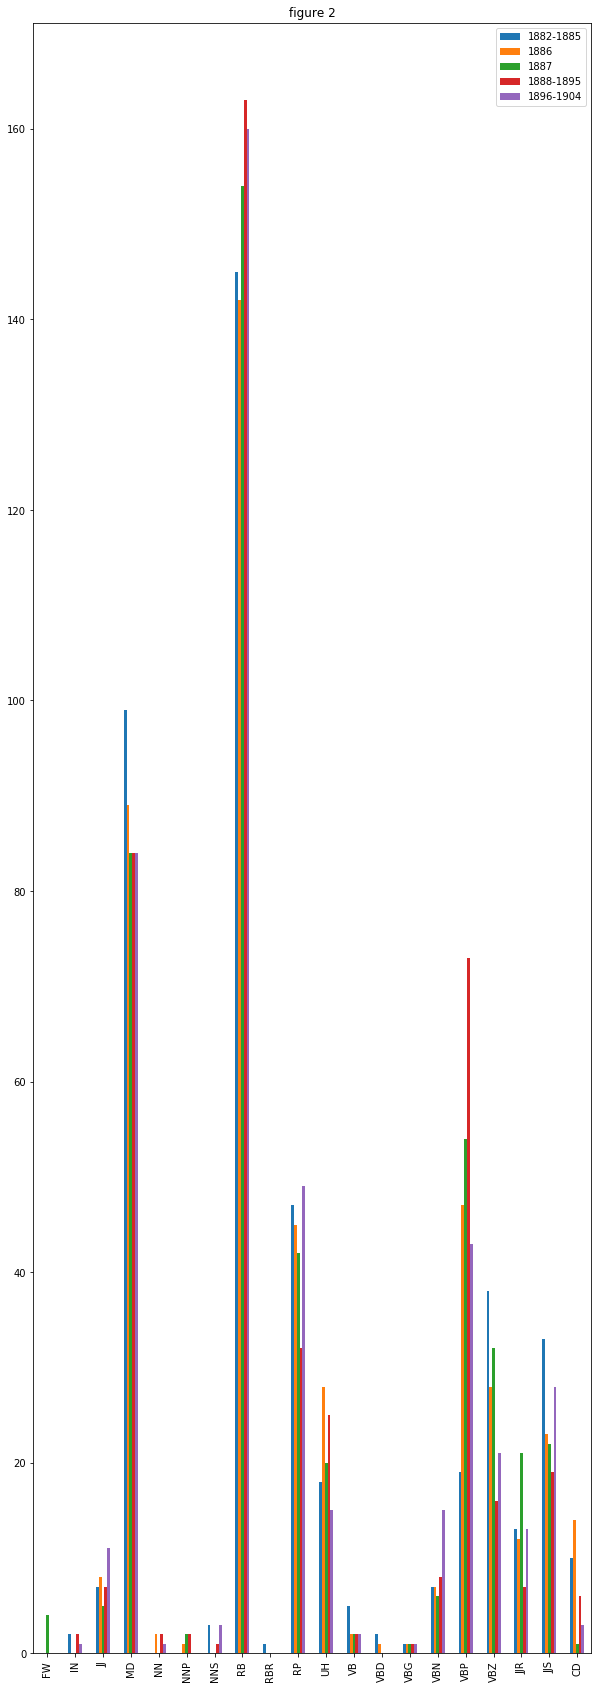

In [46]:
df.plot.bar()
plt.title('figure 2')

First of all, we can see from the graph that all the time periods have some similarity, which makes sense for they are from the same author. With the length increasing, the ratio remains the same, which means the author uses the same structure to describe things and adds more details into the stories.


# Wordnet analysis

After figuring that the writing style are changing with time passing, and there are some obvious evdence among the topics, I want to futher discuss if the changes of topics show some relation with the words' synsets. From the different definition of the synsets, we can see if the core of his writing is changing.

I first tokenize the articles with the organization of different time periods. Then use a function **_hypernym_** to find their roots of synsets with hdight of two, which can help us find meaningful synsets. The function **_hypernym_** use a token as input and then return the hypernym with its max_depth equals to 2. After doing that, I use a dictionary to store the result.

Then, I use the function **_findYear_** to find the dataframe of different pos. As I have mentioned above, I am most interested in the pos of NN, JJ,VBD, RBR and CD, so I just need the result of the three. **_findYear_** function get the pos, length of year(the total length of articles of different writing period to get the frequency of synsets) and the dictionary of the hypernums as inputs and return a dataframe of the pos as output.

In [47]:
yearToken = {}
for year in yearList:
    yearToken[year] = []
    for i in range(len(nameList)):
        if nameList[i].split('__')[0] ==year:
            yearToken[year].extend(word_tokenize(allText[i]))

In [48]:
def hypernym (name, case = 0):
    timse = 0
    if type(name) == str:
        synsets = wn.synsets(name)
        #print(synsets)
        if len(synsets)<1:
            #print("word name is:", name)
            #print("synsets", synsets)
            #print("cannot find the synsets")
            return "cannot_find_the_synsets"
        synset = synsets[0]
        times = synset.max_depth()
        hypers = synset.hypernyms()
        if len(hypers) <1:
            flag = 0
            #print("cannot find hypers simply:")#try other elements of synsets to find hypernyms
            for names in synsets:
                if len(names.hypernyms())>0:
                    hypers = names.hypernyms()
                    flag = 1
                    break
            if flag ==0:
                if case == 1:
                    return synsets[0]
                #print(name)
                case = 1
                name = name.capitalize()
                return hypernym(name,1)
        hyper = hypers[0]
        #print("the hypernym is: "+hyper.name())
    elif type(name) == nltk.corpus.reader.wordnet.Synset:
        #print(name)
        times = name.max_depth()
        hypers = name.hypernyms()
        if len(hypers)<1:
            print("cannot find hyper nym and the name is:", name,"\t", hypers)
        else:
            hyper = hypers[0]
    else:
        return ("wrong input:", name)
    
    #print(times)
    if times>2:
        return hypernym(hyper)
    else:
        return name

def hyper_depth(name):
        synsets = wn.synsets(name)
        #print(synsets)
        if len(synsets)<1:
            #print("word name is:", name)
            #print("synsets", synsets)
            #print("cannot find the synsets")
            return "cannot_find_the_synsets"
        synset = synsets[0]
        times = synset.max_depth()
        return times

In [49]:
a = wn.synsets('a')[0]

In [50]:
namePos = {}
for name in yearToken:
    namePos[name] = pos_tag(yearToken[name])

In [51]:
PosNames = []
for name in namePos:
    for pos in namePos[name]:
        if pos[1] not in PosNames:
            PosNames.append(pos[1])

In [52]:
PosDictionary = {}
for name in namePos:
    PosDictionary[name] = {}
    for pos in namePos[name]:
        #print(pos)
        if pos[1] not in PosDictionary[name]:
            #print(pos[1])
            PosDictionary[name][pos[1]] = [pos[0]]
            #print("new pos, {} is {}".format(str(pos[1]),str(pos[0])))
        else:
            #print(pos[1])
            PosDictionary[name][pos[1]].append(pos[0])
            #print("add pos")
        

In [53]:
Final = {}
for name in PosDictionary:
    Final[name] = {}
    for sets in PosDictionary[name]:
        Final[name][sets] = {}
        Set = []
        #print(sets)
        for word in PosDictionary[name][sets]:
            #print(word)
            #print(hypernym(word))
            if hypernym(word) not in Final[name][sets]:
                Final[name][sets][hypernym(word)] = [word]
            else:
                Final[name][sets][hypernym(word)].append(word)
    #print("/n/n")

cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 

cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('have.v.02') 	 []
cannot find hyper nym and the name is: Synset('have.v.02') 	 []
cannot find hyper nym and the name is: Synset('have.v.02') 	 []
cannot find hyper nym and the name is: Synset('have.v.02') 	 []
cannot find hyper nym and the name is: Synset('have.v.02') 	 []
cannot find hyper nym and the name is: Synset('have.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find h

In [54]:
resultDic = {}
for name in Final:
    resultDic[name] = {}
    for nam in Final[name]:
        resultDic[name][nam] = {}
        sum = 0
        for na in Final[name][nam]:
            sum+=len(Final[name][nam][na])
            resultDic[name][nam][na] = len(Final[name][nam][na])
        resultDic[name][nam]['sum'] = sum

In [55]:
for i in range(len(yearList)):
    year = yearList[i]
    for pos in resultDic[year]:
        resultDic[year][pos]['ratio'] = resultDic[year][pos]['sum']/yearLength[i]

In [56]:
'''
yearJJ = {}
yearNN = {}
for year in resultDic:
    yearJJ[year] = resultDic[year]['JJ'] 
    
    '''

"\nyearJJ = {}\nyearNN = {}\nfor year in resultDic:\n    yearJJ[year] = resultDic[year]['JJ'] \n    \n    "

In [57]:

def findYear(tags,yearLength,resultDic):
    yearPos = {}

    for year in resultDic:
        yearPos[year] = resultDic[year][tags] 
        
    for year in yearPos:
        temp = {}
        for syn in yearPos[year]:
            if type(syn)!=str:
                temp[syn] = yearPos[year][syn]
        yearPos[year] = temp
    yearPos_ = {}
    for year in yearPos:
        yearPos_[year] = {}
        for pos in yearPos[year]:
            yearPos_[year][pos.name().split('.')[0]] = yearPos[year][pos]
    yearSort = {}
    for year in yearPos_:
        yearSort[year] = sorted(yearPos_[year], key=yearPos_[year].get,reverse= True) 
    for year in yearSort:
        yearSort[year] = yearSort[year][:8] 
    nameList = []
    for year in yearSort:
        for name in yearSort[year]:
            if name not in nameList:
                nameList.append(name)
    F_list = {}
    for i in range(len(yearPos_)):
        year = yearList[i] 
        F_list[year] = {}
        for name in nameList:
            if name in yearSort[year]:
                F_list[year][name] = yearPos_[year][name]/yearLength[i]
            else:
                F_list[year][name] = 0   
    df = pd.DataFrame(F_list).T
    return df

In [58]:
'''
for year in yearJJ:
    temp = {}
    for syn in yearJJ[year]:
        if type(syn)!=str:
            temp[syn] = yearJJ[year][syn]
    yearJJ[year] = temp
'''

'\nfor year in yearJJ:\n    temp = {}\n    for syn in yearJJ[year]:\n        if type(syn)!=str:\n            temp[syn] = yearJJ[year][syn]\n    yearJJ[year] = temp\n'

In [59]:
'''
yearJJ_ = {}
for year in yearJJ:
    yearJJ_[year] = {}
    for pos in yearJJ[year]:
        yearJJ_[year][pos.name().split('.')[0]] = yearJJ[year][pos]
'''

"\nyearJJ_ = {}\nfor year in yearJJ:\n    yearJJ_[year] = {}\n    for pos in yearJJ[year]:\n        yearJJ_[year][pos.name().split('.')[0]] = yearJJ[year][pos]\n"

In [60]:
'''
yearSort = {}
for year in yearJJ_:
    yearSort[year] = sorted(yearJJ_[year], key=yearJJ_[year].get,reverse= True)
'''

'\nyearSort = {}\nfor year in yearJJ_:\n    yearSort[year] = sorted(yearJJ_[year], key=yearJJ_[year].get,reverse= True)\n'

In [61]:
'''
for year in yearSort:
    yearSort[year] = yearSort[year][:20]
'''

'\nfor year in yearSort:\n    yearSort[year] = yearSort[year][:20]\n'

In [62]:
'''
nameList = []
for year in yearSort:
    for name in yearSort[year]:
        if name not in nameList:
            nameList.append(name)
'''

'\nnameList = []\nfor year in yearSort:\n    for name in yearSort[year]:\n        if name not in nameList:\n            nameList.append(name)\n'

In [63]:
'''
F_list = {}
for year in yearJJ_:
    F_list[year] = {}
    for name in nameList:
        if name in yearSort[year]:
            F_list[year][name] = yearJJ_[year][name]/yearLength[year]
        else:
            F_list[year][name] = 0
'''

'\nF_list = {}\nfor year in yearJJ_:\n    F_list[year] = {}\n    for name in nameList:\n        if name in yearSort[year]:\n            F_list[year][name] = yearJJ_[year][name]/yearLength[year]\n        else:\n            F_list[year][name] = 0\n'

In [64]:
dfJJ = findYear('JJ',yearLength,resultDic)
dfNN = findYear('NN',yearLength,resultDic)
dfVBD = findYear('VBD',yearLength,resultDic)
dfRBR = findYear('RBR',yearLength,resultDic)
dfRB = findYear('RB',yearLength,resultDic)

"\ndfRB.plot.area(stacked=False)\n\ndfRBR.plot.area(stacked=False)\nplt.title('3-4-RBR')\n#dfRBR.plot.bar()\n"

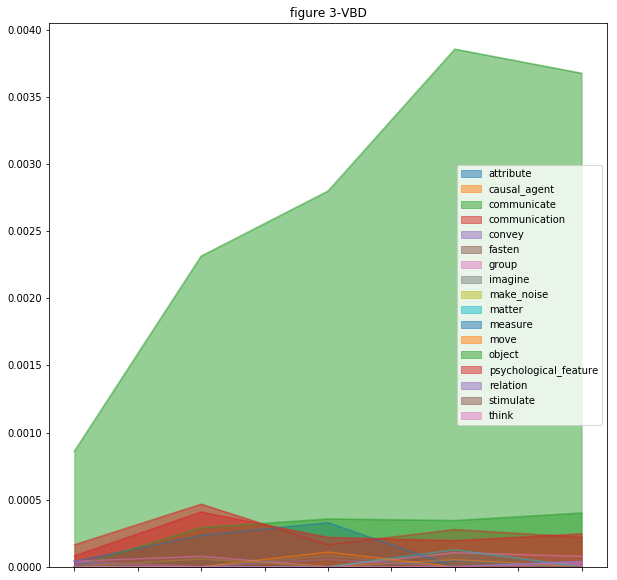

In [65]:
plt.rcParams['figure.figsize'] = [10, 10]
'''
dfJJ.plot.area(stacked=False)
plt.title('3-1-JJ')
#dfJJ.plot.bar()

dfNN.plot.area(stacked=False)
plt.title('3-2-NN')
#dfNN.plot.bar()
'''
dfVBD.plot.area(stacked=False)
plt.title('figure 3-VBD')
#dfVBD.plot.bar()

'''
dfRB.plot.area(stacked=False)

dfRBR.plot.area(stacked=False)
plt.title('3-4-RBR')
#dfRBR.plot.bar()
'''

As I have mentioned above, I have found that the writing style of Chehov has regularly changed with time passing by, so from the graph above, I want to find the changes suiting the variation. 

In JJ, adjective or numeral, ordinal, I found that the frequency of causal_agent ,group and object are becoming lower, and the frequency of psychological_feature is becoming higher. Which may suggest that Chekhov was writing more with the inner behaviours of human beings than outside descriptions. He focused more with the pyschological activities and can hit our heart easier.

In NN, noun, common, singular or mass, there is no obvious tendency which means his writing themes haven't changed so much. 

In VBD, verb, past tense, there is a hugh increase in communicate, which shows a shift from simple description to dialogs. The personality is better expressed with communications that by which the author build the character more vividly.

In RB, adverb, away is becoming less, which is really interesting.

In RBR,  adverb, comparative,there is no obvious tendency and maybe the emotions insides the articles haven't changed a lot.